references:

[1] https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/08_pytorch_paper_replicating_exercise_solutions.ipynb



### Is transformers all we need?
in this part of project, we train multimodal transformer to see if this boost ourperformance or not

In [1]:
pip install -U --no-cache-dir gdown --pre


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
# first importing libraries
import base64
import requests
import numpy as np
import gdown
from zipfile import ZipFile
import os

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import pandas as pd
from torchvision.io import read_image
import re
import cv2
from skimage.transform import resize
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from torch.optim import lr_scheduler


from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

import time
import os
import copy
import string

from nltk.corpus import stopwords
import nltk
import itertools
nltk.download('stopwords')
import nltk 
nltk.download('stopwords')
nltk.download ('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
from google.colab import drive
drive.mount('/content/gdrive') # we use google drive to load files and save models there! so change path files based on your own data and run the code!

Mounted at /content/gdrive


In [5]:
!git clone https://github.com/XL2248/MSCTD.git

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Updating files: 100% (934/934), done.


downloading necessary files

In [6]:
!gdown --id 1GAZgPpTUBSfhne-Tp0GDkvSHuq6EMMbj

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GAZgPpTUBSfhne-Tp0GDkvSHuq6EMMbj
To: /content/train_ende.zip
100% 2.90G/2.90G [00:45<00:00, 63.1MB/s]


In [7]:
!gdown --id 12HM8uVNjFg-HRZ15ADue4oLGFAYQwvTA

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12HM8uVNjFg-HRZ15ADue4oLGFAYQwvTA
To: /content/dev.zip
100% 638M/638M [00:13<00:00, 48.8MB/s]


In [8]:
!gdown --id 1B9ZFmSTqfTMaqJ15nQDrRNLqBvo-B39W

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1B9ZFmSTqfTMaqJ15nQDrRNLqBvo-B39W
To: /content/test.zip
100% 641M/641M [00:05<00:00, 114MB/s] 


we manually move files to our drive and then unzip them on colab disk

In [12]:
!unzip /content/gdrive/MyDrive/Image_MSTCD/train_ende.zip -d /content/Image_MSTCD

Streaming output truncated to the last 5000 lines.
  inflating: /content/Image_MSTCD/train_ende/5499.jpg  
  inflating: /content/Image_MSTCD/train_ende/55.jpg  
  inflating: /content/Image_MSTCD/train_ende/550.jpg  
  inflating: /content/Image_MSTCD/train_ende/5500.jpg  
  inflating: /content/Image_MSTCD/train_ende/5501.jpg  
  inflating: /content/Image_MSTCD/train_ende/5502.jpg  
  inflating: /content/Image_MSTCD/train_ende/5503.jpg  
  inflating: /content/Image_MSTCD/train_ende/5504.jpg  
  inflating: /content/Image_MSTCD/train_ende/5505.jpg  
  inflating: /content/Image_MSTCD/train_ende/5506.jpg  
  inflating: /content/Image_MSTCD/train_ende/5507.jpg  
  inflating: /content/Image_MSTCD/train_ende/5508.jpg  
  inflating: /content/Image_MSTCD/train_ende/5509.jpg  
  inflating: /content/Image_MSTCD/train_ende/551.jpg  
  inflating: /content/Image_MSTCD/train_ende/5510.jpg  
  inflating: /content/Image_MSTCD/train_ende/5511.jpg  
  inflating: /content/Image_MSTCD/train_ende/5512.jpg  
 

In [13]:
os.rename('/content/Image_MSTCD/train_ende','/content/Image_MSTCD/train')

In [14]:
!unzip /content/gdrive/MyDrive/Image_MSTCD/test.zip -d /content/Image_MSTCD

Streaming output truncated to the last 5000 lines.
  inflating: /content/Image_MSTCD/test/1058.jpg  
  inflating: /content/Image_MSTCD/test/1059.jpg  
  inflating: /content/Image_MSTCD/test/106.jpg  
  inflating: /content/Image_MSTCD/test/1060.jpg  
  inflating: /content/Image_MSTCD/test/1061.jpg  
  inflating: /content/Image_MSTCD/test/1062.jpg  
  inflating: /content/Image_MSTCD/test/1063.jpg  
  inflating: /content/Image_MSTCD/test/1064.jpg  
  inflating: /content/Image_MSTCD/test/1065.jpg  
  inflating: /content/Image_MSTCD/test/1066.jpg  
  inflating: /content/Image_MSTCD/test/1067.jpg  
  inflating: /content/Image_MSTCD/test/1068.jpg  
  inflating: /content/Image_MSTCD/test/1069.jpg  
  inflating: /content/Image_MSTCD/test/107.jpg  
  inflating: /content/Image_MSTCD/test/1070.jpg  
  inflating: /content/Image_MSTCD/test/1071.jpg  
  inflating: /content/Image_MSTCD/test/1072.jpg  
  inflating: /content/Image_MSTCD/test/1073.jpg  
  inflating: /content/Image_MSTCD/test/1074.jpg  
 

In [15]:
!unzip /content/gdrive/MyDrive/Image_MSTCD/dev.zip -d /content/Image_MSTCD

Streaming output truncated to the last 5000 lines.
  inflating: /content/Image_MSTCD/dev/1054.jpg  
  inflating: /content/Image_MSTCD/dev/1055.jpg  
  inflating: /content/Image_MSTCD/dev/1056.jpg  
  inflating: /content/Image_MSTCD/dev/1057.jpg  
  inflating: /content/Image_MSTCD/dev/1058.jpg  
  inflating: /content/Image_MSTCD/dev/1059.jpg  
  inflating: /content/Image_MSTCD/dev/106.jpg  
  inflating: /content/Image_MSTCD/dev/1060.jpg  
  inflating: /content/Image_MSTCD/dev/1061.jpg  
  inflating: /content/Image_MSTCD/dev/1062.jpg  
  inflating: /content/Image_MSTCD/dev/1063.jpg  
  inflating: /content/Image_MSTCD/dev/1064.jpg  
  inflating: /content/Image_MSTCD/dev/1065.jpg  
  inflating: /content/Image_MSTCD/dev/1066.jpg  
  inflating: /content/Image_MSTCD/dev/1067.jpg  
  inflating: /content/Image_MSTCD/dev/1068.jpg  
  inflating: /content/Image_MSTCD/dev/1069.jpg  
  inflating: /content/Image_MSTCD/dev/107.jpg  
  inflating: /content/Image_MSTCD/dev/1070.jpg  
  inflating: /conten

In [16]:
"""
data loader class for getting data but one image (and it corresponding dialogue and label at a time)
inputs:
  image_path: folder path of image data
  txt_path: folder path of txt data
  language: language type(english,german,...)
  mode: train,test,validation 
  image_format: jpg,png,...
  sclae: upscaling or downscaling image
  transform: transformation we want to apply on data
  target_transform: transformation we want to apply on labels



"""
class MSTCDDate(Dataset):
   

  def __init__(self,image_path,txt_path,language,mode,image_format,scale, transform=None, target_transform=None):
     
      text_loader = language + '_' + mode + '.txt'
      sentiment_loader = 'sentiment_' + mode+'.txt'
      index_file = 'image_index_' + mode + '.txt'
      self.image_path = image_path
      self.transform = transform
      self.target_transform = target_transform
      self.mode = mode
      self.image_format = image_format
      self.scale = scale
      for file_names in os.scandir(txt_path):
        name_file = os.path.basename(file_names)
        if name_file == text_loader:
          with open(file_names.path) as f:
            self.text_file = [line.rstrip('\n') for line in f]
        if name_file == sentiment_loader:
          with open(file_names.path) as f:
            self.sentiment_file = [line.rstrip('\n') for line in f]
        if name_file == index_file:
          with open(file_names.path) as f:
            self.index_file = [line.rstrip('\n') for line in f]

  def __len__(self):
      return len(self.text_file)

  def __getitem__(self, idx):
      image_path_complete = self.image_path + '/' + self.mode + '/'
      text_file_chosen = self.text_file[idx]
      sentiment_chosen = int(self.sentiment_file[idx])
      temp_image = cv2.imread(image_path_complete+str(idx)+ '.' + self.image_format)
      n1,n2,n3 = np.shape(temp_image)
      if self.scale != 1:
        image = resize(temp_image,[int(n1/self.scale),int(n2/self.scale)], anti_aliasing=True)
      else:
        image = temp_image
      if self.transform:
          image = self.transform(image)
      if self.target_transform:
          label = self.target_transform(sentiment_chosen)
      return  text_file_chosen,sentiment_chosen,image

In [ ]:
data_train = MSTCDDate('/content/Image_MSTCD','/content/MSCTD/MSCTD_data/ende','english','train','jpg',1)
text_file_chosen,sentiment_chosen,img = data_train[3]

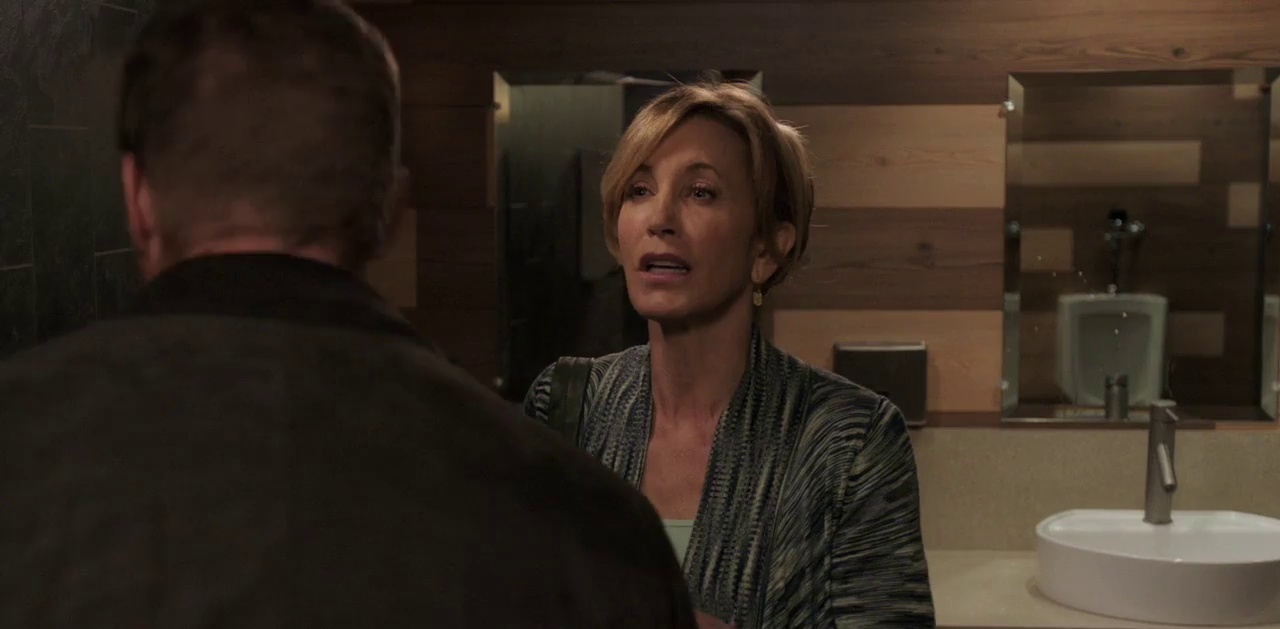

In [ ]:
cv2_imshow(img)

In [17]:
!pip install transformers
from transformers import AutoTokenizer, VisualBertModel
import torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 99.4 MB/s eta 0:00:00


Creating image tokenizer

In [ ]:

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = VisualBertModel.from_pretrained("uclanlp/visualbert-vqa-coco-pre")


inputs = tokenizer("The capital of France is Paris.", return_tensors="pt")
#visual_embeds = get_visual_embeddings(img).unsqueeze(0)
a = np.array([0,0,1])
b = np.array([0,1,0])
visual_embeds = torch.ones((12,2048),dtype=torch.float)
visual_embeds = visual_embeds.unsqueeze(0)
visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.long)
visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.float)

inputs.update(
    {
        "visual_embeds": visual_embeds,
        "visual_token_type_ids": visual_token_type_ids,
        "visual_attention_mask": visual_attention_mask,
    }
)
inputs = inputs.to(device)
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Creating a Visual Transformer[1]

in first part we train just a visual transformer to train a patch embedder, so we can use it in next part (using faster rcnn and networks like that are so big that we couldn't use it with google colab so we used this method to solve our issue)

In [18]:

# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.
    
    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """ 
    # 2. Initialize the class with appropriate variables
    def __init__(self, 
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=2048):
        super().__init__()
        
        self.patch_size = patch_size
        
        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method 
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % self.patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {self.patch_size}"
        
        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched) 
        # 6. Make sure the output shape has the right order 
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]
     

In [ ]:

test_input = torch.randn(32, 3, 100, 100)
print(f"input test size = {test_input.shape}")
     

input test size = torch.Size([32, 3, 100, 100])


In [ ]:
patch_embedding = PatchEmbedding(patch_size=25)
patch_embedding_output = patch_embedding(test_input)
print(f"Input shape: {test_input.shape}")
print(f"Output shape: {patch_embedding_output.shape} -> (batch_size, num_patches, embedding_dim)") 
   

Input shape: torch.Size([32, 3, 100, 100])
Output shape: torch.Size([32, 16, 2048]) -> (batch_size, num_patches, embedding_dim)


In [ ]:
transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768,
                                                       nhead=12,
                                                       dim_feedforward=3072,
                                                       dropout=0.1,
                                                       activation="gelu",
                                                       batch_first=True,
                                                       norm_first=True)
transformer_encoder_layer


TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

transformer_encoder = nn.TransformerEncoder(
    encoder_layer=transformer_encoder_layer,
    num_layers=2)


In [19]:
 class ViT(nn.Module): 
  def __init__(self,
               img_size=100, # from Table 3
               num_channels=3,
               patch_size=25,
               embedding_dim=2048, # from Table 1
               dropout=0.1, 
               mlp_size=128, # from Table 1
               num_transformer_layers=2, # from Table 1
               num_heads=8, # from Table 1 (number of multi-head self attention heads)
               num_classes=1000): # generic number of classes (this can be adjusted)
    super().__init__()

    # Assert image size is divisible by patch size 
    assert img_size % patch_size == 0, "Image size must be divisble by patch size."

    # 1. Create patch embedding
    self.patch_embedding = PatchEmbedding(in_channels=num_channels,
                                          patch_size=patch_size,
                                          embedding_dim=embedding_dim)

    # 2. Create class token
    self.class_token = nn.Parameter(torch.randn(1, 1, embedding_dim),
                                    requires_grad=True)

    # 3. Create positional embedding
    num_patches = (img_size * img_size) // patch_size**2 # N = HW/P^2
    self.positional_embedding = nn.Parameter(torch.randn(1, num_patches+1, embedding_dim))

    # 4. Create patch + position embedding dropout 
    self.embedding_dropout = nn.Dropout(p=dropout)

    # # 5. Create Transformer Encoder layer (single)
    # self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=embedding_dim,
    #                                                             nhead=num_heads,
    #                                                             dim_feedforward=mlp_size,
    #                                               
        # 5. Create stack Transformer Encoder layers (stacked single layers)
    self.transformer_encoder = nn.TransformerEncoder(encoder_layer=nn.TransformerEncoderLayer(d_model=embedding_dim,
                                                                                              nhead=num_heads,
                                                                                              dim_feedforward=mlp_size,
                                                                                              activation="gelu",
                                                                                              batch_first=True,
                                                                                              norm_first=True), # Create a single Transformer Encoder Layer
                                                     num_layers=num_transformer_layers) # Stack it N times

    # 7. Create MLP head
    self.mlp_head = nn.Sequential(
        nn.LayerNorm(normalized_shape=embedding_dim),
        nn.Linear(in_features=embedding_dim,
                  out_features=num_classes)
    )

  def forward(self, x):
    # Get some dimensions from x
    batch_size = x.shape[0]

    # Create the patch embedding
    x = self.patch_embedding(x)
    # print(x.shape)

    # First, expand the class token across the batch size
    class_token = self.class_token.expand(batch_size, -1, -1) # "-1" means infer the dimension

    # Prepend the class token to the patch embedding
    x = torch.cat((class_token, x), dim=1)
    # print(x.shape)

    # Add the positional embedding to patch embedding with class token
    x = self.positional_embedding + x
    # print(x.shape)

    # Dropout on patch + positional embedding
    x = self.embedding_dropout(x)

    # Pass embedding through Transformer Encoder stack
    x = self.transformer_encoder(x)

    # Pass 0th index of x through MLP head
    x = self.mlp_head(x[:, 0])
    return x

In [20]:

demo_img = torch.randn(1, 3, 100, 100).to(device)
print(demo_img.shape) 

# Create ViT
vit = ViT(num_classes=3).to(device)
vit(demo_img)

torch.Size([1, 3, 100, 100])


tensor([[-0.5459,  0.5235,  0.1343]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
# we train this module to use it layer for our image embedding
pathc_embedder = vit.patch_embedding
out_embedded = pathc_embedder(demo_img)
print(f"size of embedded image = {out_embedded.shape}")

size of embedded image = torch.Size([1, 16, 2048])


In [21]:
import torchvision.transforms as transforms
transformation= transforms.Compose([transforms.ToTensor(),transforms.Resize((100,100)),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [22]:
train_dataset= MSTCDDate('/content/Image_MSTCD' ,
                         '/content/MSCTD/MSCTD_data/ende',
                         'english',
                         'train',
                         'jpg',
                         1,
                         transform = transformation)

In [23]:
test_dataset= MSTCDDate('/content/Image_MSTCD' ,
                         '/content/MSCTD/MSCTD_data/ende',
                         'english',
                         'test',
                         'jpg',
                         1,
                         transform = transformation)

In [24]:
valid_dataset= MSTCDDate('/content/Image_MSTCD' ,
                         '/content/MSCTD/MSCTD_data/ende',
                         'english',
                         'dev',
                         'jpg',
                         1,
                         transform = transformation)

In [25]:
train_data_set=[]
for extracted_data in tqdm(train_dataset):
  train_data_set.append([extracted_data[2],extracted_data[1]])

100%|██████████| 20240/20240 [07:27<00:00, 45.25it/s]


In [26]:
test_data_set=[]
for extracted_data in tqdm(test_dataset):
  test_data_set.append([extracted_data[2],extracted_data[1]])

100%|██████████| 5067/5067 [01:52<00:00, 44.91it/s]


In [27]:
valid_data_set=[]
for extracted_data in tqdm(valid_dataset):
  valid_data_set.append([extracted_data[2],extracted_data[1]])

100%|██████████| 5063/5063 [01:51<00:00, 45.38it/s]


In [29]:
import pickle
with open("/content/gdrive/MyDrive/Phase_4/image_train", "wb") as fp:   #Pickling
  pickle.dump(train_data_set, fp)
with open("/content/gdrive/MyDrive/Phase_4/image_valid", "wb") as fp:   #Pickling
  pickle.dump(valid_data_set, fp)
with open("/content/gdrive/MyDrive/Phase_4/image_test", "wb") as fp:   #Pickling
  pickle.dump(test_data_set, fp)



In [ ]:
import pickle

with open("/content/gdrive/MyDrive/Phase_4/image_train", "rb") as fp:   #Pickling
  train_data_set =  pickle.load(fp)
with open("/content/gdrive/MyDrive/Phase_4/image_valid", "rb") as fp:   #Pickling
  valid_data_set = pickle.load(fp)
with open("/content/gdrive/MyDrive/Phase_4/image_test", "rb") as fp:   #Pickling
  test_data_set = pickle.load(fp)

In [30]:
from torch.utils.data import DataLoader
train_data_loader= DataLoader(train_data_set,batch_size=16,shuffle = True)
test_data_loader= DataLoader(test_data_set,batch_size=16,shuffle = False)
valid_data_loader= DataLoader(valid_data_set,batch_size=16,shuffle = False)

In [31]:
for a,b in train_data_loader:
  a = a.to(device)
  test = vit(a)
  break
print(test.shape)

torch.Size([16, 3])


In [32]:
def train_model_manual(model, criterion, optimizer,scheduler,val_beark,data_loader_train,data_loader_val,len_train,len_val, num_epochs=25):
  """
  function for train our model! 
  inputs: 
      model: input model 
      criterion: desired loss function
      optimizer: our optimizer(!)
      scheduler: for changing learning rate after sum epochs
      num_epochs: number of epoches
      val_beark: threshold for early stopping, if after "val_beark" steps our model don't get better, we end procces
  output:
      model: our trained model!


  """
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for batch,label in tqdm(data_loader_train, total=len(data_loader_train), desc="training... "):
      # 1. Forward pass
      batch = batch.to(device)
      label = label.to(device)
      outputs = model(batch) # model outputs raw logits 
      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, label)
      acc_train += torch.sum(preds == label.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()
      del outputs
    loss_train = loss_train/len_train
    acc_train = 100*acc_train/len_train
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for batch,label in tqdm(data_loader_val, total=len(data_loader_val), desc="Validating... "):
      # 1. Forward pass
        batch = batch.to(device)
        label = label.to(device)
        output = model(batch) # model outputs raw logits 
        _, preds = torch.max(output, 1)
        loss_test= criterion(output, label.data)
        acc_test += torch.sum(preds == label.data)
        del output
      loss_test = loss_test/len_val
      acc_test = 100*acc_test/len_val
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;
    

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
      del loss_test,loss_train,acc_train,acc_test
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

In [ ]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(vit.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

vit = vit.to(device)
model_vit_trained,best_loss,best_acc = train_model_manual(vit, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(train_data_set),len(valid_data_set), num_epochs=2)

Validating... : 100%|██████████| 317/317 [00:02<00:00, 115.17it/s]


Epoch: 0 | Loss: 0.08684, Acc: 34.54% | Test Loss: 0.00018, Test Acc: 36.18%


Validating... : 100%|██████████| 317/317 [00:02<00:00, 120.87it/s]


Epoch: 1 | Loss: 0.08496, Acc: 34.72% | Test Loss: 0.00026, Test Acc: 31.17%
Training complete in 1m 14s
Best val Acc: 36.184082


In [35]:
torch.save(model_vit_trained.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/vit')

In [ ]:
vit = ViT(num_classes=3).to(device)
vit = vit.to(device)
vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit'))
vit.eval()


ViT(
  (patch_embedding): PatchEmbedding(
    (patcher): Conv2d(3, 2048, kernel_size=(25, 25), stride=(25, 25))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=2048, out_features=2048, bias=True)
        )
        (linear1): Linear(in_features=2048, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=128, out_features=2048, bias=True)
        (norm1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(


In [ ]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(vit.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

vit = vit.to(device)
vit,best_loss,best_acc = train_model_manual(vit, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(train_data_set),len(valid_data_set), num_epochs=2)

Validating... : 100%|██████████| 317/317 [00:02<00:00, 123.65it/s]


Epoch: 0 | Loss: 0.08553, Acc: 34.67% | Test Loss: 0.00050, Test Acc: 35.10%


Validating... : 100%|██████████| 317/317 [00:02<00:00, 121.51it/s]


Epoch: 1 | Loss: 0.08621, Acc: 34.03% | Test Loss: 0.00045, Test Acc: 35.10%
Training complete in 2m 18s
Best val Acc: 35.097767


In [ ]:
torch.save(vit.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/vit2')

In [ ]:
vit = ViT(num_classes=3).to(device)
vit = vit.to(device)
vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit2'))
vit.eval()


ViT(
  (patch_embedding): PatchEmbedding(
    (patcher): Conv2d(3, 2048, kernel_size=(25, 25), stride=(25, 25))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=2048, out_features=2048, bias=True)
        )
        (linear1): Linear(in_features=2048, out_features=128, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=128, out_features=2048, bias=True)
        (norm1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(


In [ ]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(vit.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

vit = vit.to(device)
vit,best_loss,best_acc = train_model_manual(vit, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(train_data_set),len(valid_data_set), num_epochs=5)

Validating... : 100%|██████████| 317/317 [00:02<00:00, 118.20it/s]


Epoch: 0 | Loss: 0.08283, Acc: 35.00% | Test Loss: 0.00024, Test Acc: 36.40%


Validating... : 100%|██████████| 317/317 [00:02<00:00, 119.44it/s]


Epoch: 1 | Loss: 0.08388, Acc: 35.02% | Test Loss: 0.00027, Test Acc: 35.18%


Validating... : 100%|██████████| 317/317 [00:02<00:00, 120.76it/s]


Epoch: 2 | Loss: 0.08580, Acc: 35.07% | Test Loss: 0.00029, Test Acc: 34.72%


Validating... : 100%|██████████| 317/317 [00:02<00:00, 118.62it/s]


Epoch: 3 | Loss: 0.08358, Acc: 35.92% | Test Loss: 0.00019, Test Acc: 32.94%


Validating... : 100%|██████████| 317/317 [00:02<00:00, 119.57it/s]


Epoch: 4 | Loss: 0.08070, Acc: 35.70% | Test Loss: 0.00030, Test Acc: 28.48%
Training complete in 3m 4s
Best val Acc: 36.401344


In [ ]:
torch.save(vit.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/vit3')

In [52]:
vit = ViT(num_classes=3).to(device)
vit = vit.to(device)
if device == 'cpu':
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit3', map_location=torch.device('cpu')))
else:
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit3'))
patch_embedding = vit.patch_embedding
del vit
patch_embedding.eval()
for param in patch_embedding.parameters():
    param.requires_grad = False

### multimodal Bert

Now that we have somewhat meaningfull embedding creator for our image, it's time to use VisualBert (which is multimudal transformer) and train it for our task

In [37]:
with open('/content/MSCTD/MSCTD_data/ende/english_train.txt') as f:
    text_file_train = [line.rstrip('\n') for line in f]
with open('/content/MSCTD/MSCTD_data/ende/english_dev.txt') as f:
    text_file_dev = [line.rstrip('\n') for line in f]
with open('/content/MSCTD/MSCTD_data/ende/english_test.txt') as f:
    text_file_test = [line.rstrip('\n') for line in f]

In [38]:
print(f'all possible punctuations = {string.punctuation}')
punc_remove = string.punctuation
remove_translate = str.maketrans('', '', string.punctuation)
all_stopwords= stopwords.words('english')
chosen_stopword=[value for value in all_stopwords if value not in ["no","nor","not"]]

all possible punctuations = !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
all_txt_train = []
for txt in text_file_train:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in []]
  text_final = ""
  for i in range(len(filtered_words)):
    text_final = text_final + filtered_words[i] + " "
  text_final = text_final[:-1]
  all_txt_train.append(text_final)
all_txt_dev = []
for txt in text_file_dev:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in []]
  text_final = ""
  for i in range(len(filtered_words)):
    text_final = text_final + filtered_words[i] + " "
  text_final = text_final[:-1]
  all_txt_dev.append(text_final)
all_txt_test = []
for txt in text_file_test:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in []]
  text_final = ""
  for i in range(len(filtered_words)):
    text_final = text_final + filtered_words[i] + " "
  text_final = text_final[:-1]
  all_txt_test.append(text_final)


In [ ]:
print(text_file_test[1])
print(all_txt_test[1])

Two guys walk in, one walks out.
two guys walk in one walks out


In [40]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


In [41]:
#finding max length
len_max = 0;
X = all_txt_train
for i in range(len(X)):
  x_temp = X[i].split()
  if len(x_temp)>len_max:
    len_max = len(x_temp)
print(f"maximum length = {len_max}")
# now tokenizing based of max length we find
encoding = tokenizer.encode_plus(
    X[32],
    max_length=len_max+2,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

maximum length = 19
Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[  101, 15624,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [42]:
MAX_LEN = len_max + 2
BATCH_SIZE = 16

In [43]:
class text_image_dataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for input data. """

    def __init__(self, tokenizer, data,labels,img_list, max_len=128):
        self.data = data
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.image = img_list

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, item):
        txt_chosen = str(self.data[item])

       
        target = self.labels[item]
        chosen_img = self.image[item]
        encoding = self.tokenizer.encode_plus(
            txt_chosen,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')
       

        inputs = {
            'txt_chosen': txt_chosen,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'image': np.array(chosen_img[0])

            
        }

       
        inputs['targets'] = torch.tensor(target, dtype=torch.long)
        
        return inputs



In [44]:
# loading sentiments
with open('/content/MSCTD/MSCTD_data/ende/sentiment_train.txt') as f:
  sentiment_train = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_dev.txt') as f:
  sentiment_dev = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_test.txt') as f:
  sentiment_test = [int(line.rstrip('\n')) for line in f]

In [ ]:
dataset = text_image_dataset(
        data=all_txt_test,
        labels=sentiment_test,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

In [ ]:
sample_data = next(iter(train_data_loader))
print(sample_data.keys())

print(sample_data['txt_chosen'])
print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(np.shape(sample_data['image']))

print(sample_data['targets'].shape)
print(sample_data['targets'][0])


dict_keys(['txt_chosen', 'input_ids', 'attention_mask', 'token_type_ids', 'image', 'targets'])
['its protocol', 'here for the smell', 'this is the address of the hotel', 'hey ill bet you can help', 'but what', 'its just a twohour flight wed see them as often as we do now', 'okay sweet girl just one more', 'i support my husband', 'it says or death', 'hes a perfectly decent man', 'and what', 'do you have any idea', 'come on lets move lets move', 'unbearable', 'sir there are 623 flights at london', 'kidneys would be easy']
torch.Size([16, 21])
tensor([ 101, 2049, 8778,  102,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0])
torch.Size([16, 21])
tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([16, 21])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([16, 3, 100, 100])
torch.Size([16])
tensor(0)


In [45]:
from transformers import VisualBertConfig , BertTokenizer,BertModel

labels = ['neutral','negative','positive']
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')
MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre"
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
config = VisualBertConfig.from_pretrained(
    MODEL_NAME_OR_PATH, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

label2id: {'neutral': 0, 'negative': 1, 'positive': 2}
id2label: {0: 'neutral', 1: 'negative', 2: 'positive'}


{
  "architectures": [
    "VisualBertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "bypass_transformer": false,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "neutral",
    "1": "negative",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 1,
    "neutral": 0,
    "positive": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "visual_bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "special_visual_initialize": true,
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "visual_embedding_dim": 2048,
  "vocab_size": 30522
}



In [46]:
from torch import nn
class Visual_Bert_classifier(nn.Module):

    def __init__(self, config,MODEL_NAME_OR_PATH,fine_tune):
        super(Visual_Bert_classifier, self).__init__()

        bert_model = VisualBertModel.from_pretrained(MODEL_NAME_OR_PATH)
        if (fine_tune):
          self.bert = bert_model
        else:
          for param in bert_model.parameters():
            param.requires_grad = False
          self.bert = bert_model
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    
    def forward(self, input_ids, attention_mask, token_type_ids,visual_embeds,visual_token_type_ids,visual_attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids,attention_mask=attention_mask, token_type_ids=token_type_ids,visual_embeds = visual_embeds,visual_token_type_ids = visual_token_type_ids,visual_attention_mask = visual_attention_mask,return_dict=False)
        
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits 

In [ ]:
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


pt_model <class '__main__.Visual_Bert_classifier'>


In [ ]:
pytorch_total_params = sum(p.numel() for p in pt_model.parameters())
print(f"number of all parameters in model {pytorch_total_params}")
pytorch_total_params = sum(p.numel() for p in pt_model.parameters() if p.requires_grad)
print(f"number of trainable parameters in model {pytorch_total_params}")

number of all parameters in model 111452931
number of trainable parameters in model 111452931


In [ ]:

sample_data_txt_chosen = sample_data['txt_chosen']
sample_data_input_ids = sample_data['input_ids']
sample_data_attention_mask = sample_data['attention_mask']
sample_data_token_type_ids = sample_data['token_type_ids']
sample_data_img = sample_data['image']
sample_data_img = sample_data_img.to(device)

patch_embedding = patch_embedding.to(device)

sample_visual_embeds = patch_embedding(sample_data_img)
sample_visual_token_type_ids = torch.ones(visual_embeds.shape[:-1], dtype=torch.long)
sample_visual_attention_mask = torch.ones(visual_embeds.shape[:-1], dtype=torch.float)
print(f'shape of visual embed = {sample_visual_embeds.shape}')
print(f'shape of visual token type ids = {sample_visual_token_type_ids.shape}')
print(f'shape of visual attention mask = {sample_visual_attention_mask.shape}')

shape of visual embed = torch.Size([16, 16, 2048])
shape of visual token type ids = torch.Size([16, 16])
shape of visual attention mask = torch.Size([16, 16])


In [ ]:

sample_data_txt_chosen = sample_data['txt_chosen']
sample_data_input_ids = sample_data['input_ids']
sample_data_attention_mask = sample_data['attention_mask']
sample_data_token_type_ids = sample_data['token_type_ids']
sample_data_img = sample_data['image']



sample_data_targets = sample_data['targets']

# available for using in GPU
sample_data_input_ids = sample_data_input_ids.to(device)
sample_data_attention_mask = sample_data_attention_mask.to(device)
sample_data_token_type_ids = sample_data_token_type_ids.to(device)
sample_data_targets = sample_data_targets.to(device)
sample_data_visual_embeds = sample_visual_embeds.to(device)
sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)

outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
_, preds = torch.max(outputs, dim=1)

print(outputs[:5, :])
print(preds[:5])

tensor([[-0.3212,  0.0262,  0.3792],
        [ 0.0173, -0.0292,  0.3229],
        [-0.1693,  0.1255,  0.4769],
        [-0.0752,  0.2027,  0.4091],
        [ 0.2421,  0.1531,  0.3036]], grad_fn=<SliceBackward0>)
tensor([2, 2, 2, 2, 2])


In [62]:
def train_model_manual_visual_bert(model,patch_embedding, criterion, optimizer,scheduler,val_beark,data_loader_train,data_loader_val,len_train,len_val, num_epochs=25):
  """
  function for train our visual bert model!
  inputs: 
      model: input model 
      criterion: desired loss function
      optimizer: our optimizer(!)
      scheduler: for changing learning rate after sum epochs
      num_epochs: number of epoches
      patch_embedding: model to create image embeddings
      val_beark: threshold for early stopping, if after "val_beark" steps our model don't get better, we end procces
  output:
      model: our trained model!


  """
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for batch in tqdm(data_loader_train, total=len(data_loader_train), desc="training... "):
      # 1. Forward pass
        
      sample_data_txt_chosen = batch['txt_chosen']
      sample_data_input_ids = batch['input_ids']
      sample_data_attention_mask = batch['attention_mask']
      sample_data_token_type_ids = batch['token_type_ids']
      sample_data_img = batch['image']
      sample_data_targets = batch['targets']
      sample_data_img = sample_data_img.to(device)

      patch_embedding = patch_embedding.to(device)
      with torch.no_grad():
        sample_visual_embeds = patch_embedding(sample_data_img)
      sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
      sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

      sample_data_input_ids = sample_data_input_ids.to(device)
      sample_data_attention_mask = sample_data_attention_mask.to(device)
      sample_data_token_type_ids = sample_data_token_type_ids.to(device)
      sample_data_targets = sample_data_targets.to(device)
      sample_data_visual_embeds = sample_visual_embeds.to(device)
      sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
      sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)








      outputs = model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)

      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, sample_data_targets)
      acc_train += torch.sum(preds == sample_data_targets.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()
      del outputs,sample_data_input_ids,sample_data_attention_mask,sample_data_token_type_ids,sample_data_targets,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask

    loss_train = loss_train/len_train
    acc_train = 100*acc_train/len_train
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for batch in tqdm(data_loader_val, total=len(data_loader_val), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)



        _, preds = torch.max(outputs, 1)
        loss_test= criterion(outputs, sample_data_targets.data)
        acc_test += torch.sum(preds == sample_data_targets.data)
        del outputs,sample_data_input_ids,sample_data_attention_mask,sample_data_token_type_ids,sample_data_targets,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask
      loss_test = loss_test/len_val
      acc_test = 100*acc_test/len_val
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;
    

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
      del loss_test,loss_train,acc_train,acc_test
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

In [ ]:
dataset = text_image_dataset(
        data=all_txt_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=all_txt_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

In [ ]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=5)

Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.84it/s]


Epoch: 0 | Loss: 0.06236, Acc: 50.11% | Test Loss: 0.00015, Test Acc: 58.27%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.86it/s]


Epoch: 1 | Loss: 0.05624, Acc: 59.17% | Test Loss: 0.00020, Test Acc: 57.50%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.85it/s]


Epoch: 2 | Loss: 0.05219, Acc: 62.96% | Test Loss: 0.00016, Test Acc: 58.88%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.73it/s]


Epoch: 3 | Loss: 0.04826, Acc: 66.79% | Test Loss: 0.00014, Test Acc: 59.51%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.77it/s]


Epoch: 4 | Loss: 0.04394, Acc: 70.50% | Test Loss: 0.00009, Test Acc: 58.94%
Training complete in 13m 19s
Best val Acc: 59.510170


In [ ]:
torch.save(pt_model.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/visual_transformer')

In [ ]:
criterion = nn.CrossEntropyLoss()
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=3, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=20)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.82it/s]


Epoch: 0 | Loss: 0.06362, Acc: 48.15% | Test Loss: 0.00022, Test Acc: 58.25%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.86it/s]


Epoch: 1 | Loss: 0.05426, Acc: 61.27% | Test Loss: 0.00010, Test Acc: 57.36%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.68it/s]


Epoch: 2 | Loss: 0.05033, Acc: 64.58% | Test Loss: 0.00024, Test Acc: 58.27%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.79it/s]


Epoch: 3 | Loss: 0.04350, Acc: 70.64% | Test Loss: 0.00029, Test Acc: 58.50%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.72it/s]


Epoch: 4 | Loss: 0.03961, Acc: 73.58% | Test Loss: 0.00022, Test Acc: 58.21%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.70it/s]


Epoch: 5 | Loss: 0.03537, Acc: 77.16% | Test Loss: 0.00009, Test Acc: 57.71%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.74it/s]


Epoch: 6 | Loss: 0.02768, Acc: 82.87% | Test Loss: 0.00024, Test Acc: 57.63%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.45it/s]


Epoch: 7 | Loss: 0.02390, Acc: 85.35% | Test Loss: 0.00042, Test Acc: 58.21%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.76it/s]


Epoch: 8 | Loss: 0.02058, Acc: 87.29% | Test Loss: 0.00025, Test Acc: 56.86%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.66it/s]


Epoch: 9 | Loss: 0.01546, Acc: 90.76% | Test Loss: 0.00033, Test Acc: 56.78%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.70it/s]


Epoch: 10 | Loss: 0.01342, Acc: 91.98% | Test Loss: 0.00064, Test Acc: 57.08%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.85it/s]


Epoch: 11 | Loss: 0.01216, Acc: 92.76% | Test Loss: 0.00022, Test Acc: 57.12%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.70it/s]


Epoch: 12 | Loss: 0.00949, Acc: 94.38% | Test Loss: 0.00021, Test Acc: 56.57%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.73it/s]


Epoch: 13 | Loss: 0.00828, Acc: 95.11% | Test Loss: 0.00055, Test Acc: 56.73%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.66it/s]


Epoch: 14 | Loss: 0.00771, Acc: 95.41% | Test Loss: 0.00057, Test Acc: 56.25%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.70it/s]


Epoch: 15 | Loss: 0.00696, Acc: 95.92% | Test Loss: 0.00005, Test Acc: 56.86%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.71it/s]


Epoch: 16 | Loss: 0.00651, Acc: 96.16% | Test Loss: 0.00032, Test Acc: 57.08%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.66it/s]


Epoch: 17 | Loss: 0.00645, Acc: 96.37% | Test Loss: 0.00066, Test Acc: 56.82%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.69it/s]


Epoch: 18 | Loss: 0.00584, Acc: 96.68% | Test Loss: 0.00046, Test Acc: 57.00%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.70it/s]


Epoch: 19 | Loss: 0.00573, Acc: 96.71% | Test Loss: 0.00036, Test Acc: 56.84%
Training complete in 53m 11s
Best val Acc: 58.502865


In [ ]:
criterion = nn.CrossEntropyLoss()
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.RMSprop(pt_model.parameters(), lr=0.01)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=10, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=5)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:10<00:00, 29.21it/s]


Epoch: 0 | Loss: 0.35452, Acc: 34.07% | Test Loss: 0.00196, Test Acc: 28.60%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.58it/s]


Epoch: 1 | Loss: 0.32561, Acc: 33.99% | Test Loss: 0.00158, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.79it/s]


Epoch: 2 | Loss: 0.32738, Acc: 33.45% | Test Loss: 0.00157, Test Acc: 35.10%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.65it/s]


Epoch: 3 | Loss: 0.31922, Acc: 34.21% | Test Loss: 0.00163, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.67it/s]


Epoch: 4 | Loss: 0.32520, Acc: 33.58% | Test Loss: 0.00221, Test Acc: 35.10%
Training complete in 13m 39s
Best val Acc: 36.302586


As we can see, when we trained model with SGD, we achived highest validation accuracy(59.5) lets plot it's confusion and report it f1 score 

In [ ]:
dataset = text_image_dataset(
        data=all_txt_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=all_txt_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=all_txt_test,
        labels=sentiment_test,
        tokenizer=tokenizer,
        img_list = test_data_set,
        max_len=MAX_LEN,)
test_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)





In [ ]:
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)
if device == 'cpu':
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer',map_location=torch.device('cpu')))
else:
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer'))

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
prob_val=torch.tensor([]).to(device)
label_val=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_val=torch.cat((prob_val,preds))
        label_val=torch.cat((label_val,sample_data_targets))

Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.33it/s]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


from sklearn import metrics

In [ ]:
label_val=label_val.cpu()
prob_val=prob_val.cpu()
acc_test = accuracy_score(label_val,prob_val)
f1_test = f1_score(label_val, prob_val, average="macro")
pre_test = precision_score(label_val, prob_val, average="macro")
recall_test = recall_score(label_val, prob_val, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")

accuracy score on validation data: 0.5935216274935808
f1 score on validation data: 0.5924948506668688
precision score on validation data: 0.5917376744066173
recall score on validation data: 0.5939719092970319


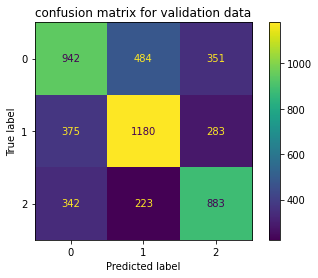

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_val, prob_val.cpu())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for validation data')

plt.show()

In [ ]:
prob_train=torch.tensor([]).to(device)
label_train=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(train_data_loader, total=len(train_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_train=torch.cat((prob_train,preds))
        label_train=torch.cat((label_train,sample_data_targets))

Validating... : 100%|██████████| 1265/1265 [00:43<00:00, 28.88it/s]


In [ ]:
label_train=label_train.cpu()
prob_train=prob_train.cpu()
acc_test = accuracy_score(label_train,prob_train)
f1_test = f1_score(label_train, prob_train, average="macro")
pre_test = precision_score(label_train, prob_train, average="macro")
recall_test = recall_score(label_train, prob_train, average="macro")
print(f"accuracy score on train data: {acc_test}")
print(f"f1 score on train data: {f1_test}")
print(f"precision score on train data: {pre_test}")
print(f"recall score on train data: {recall_test}")

accuracy score on train data: 0.7507411067193676
f1 score on train data: 0.7487956212103014
precision score on train data: 0.7471924010713568
recall score on train data: 0.7515377034802242


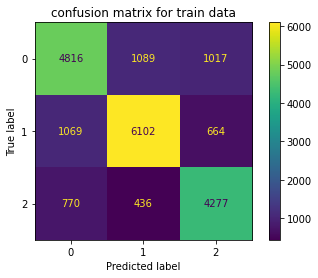

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_train, prob_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for train data')

plt.show()

In [ ]:
prob_test=torch.tensor([]).to(device)
label_test=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(test_data_loader, total=len(test_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_test=torch.cat((prob_test,preds))
        label_test=torch.cat((label_test,sample_data_targets))

Validating... : 100%|██████████| 317/317 [00:14<00:00, 21.94it/s]


In [ ]:
label_test=label_test.cpu()
prob_test=prob_test.cpu()
acc_test = accuracy_score(label_test,prob_test)
f1_test = f1_score(label_test, prob_test, average="macro")
pre_test = precision_score(label_test, prob_test, average="macro")
recall_test = recall_score(label_test, prob_test, average="macro")
print(f"accuracy score on test data: {acc_test}")
print(f"f1 score on test data: {f1_test}")
print(f"precision score on test data: {pre_test}")
print(f"recall score on test data: {recall_test}")

accuracy score on test data: 0.596210775606868
f1 score on test data: 0.5866123072422492
precision score on test data: 0.5892249981711636
recall score on test data: 0.5899266375517499


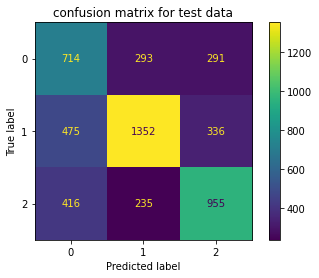

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_test, prob_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for test data')

plt.show()

as we can see, using this method we can increase our accuracy to near 60% and predicted labels also have a good distribution (all classes are predicted)
lets train with some other setting

### trying other setting for training model

In [ ]:
#finding max length
len_max = 0;
X = text_file_train
for i in range(len(X)):
  x_temp = X[i].split()
  if len(x_temp)>len_max:
    len_max = len(x_temp)
print(f"maximum length = {len_max}")
# now tokenizing based of max length we find
encoding = tokenizer.encode_plus(
    X[32],
    max_length=len_max+2,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

maximum length = 19
Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[  101, 15624,  1012,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [ ]:
dataset = text_image_dataset(
        data=text_file_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

In [ ]:
criterion = nn.CrossEntropyLoss()
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=20, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=20)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.24it/s]


Epoch: 0 | Loss: 0.06042, Acc: 51.90% | Test Loss: 0.00010, Test Acc: 58.03%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 26.01it/s]


Epoch: 1 | Loss: 0.05188, Acc: 63.11% | Test Loss: 0.00013, Test Acc: 60.50%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.99it/s]


Epoch: 2 | Loss: 0.04796, Acc: 66.67% | Test Loss: 0.00012, Test Acc: 58.34%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.96it/s]


Epoch: 3 | Loss: 0.04412, Acc: 70.19% | Test Loss: 0.00025, Test Acc: 58.62%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.97it/s]


Epoch: 4 | Loss: 0.03986, Acc: 73.61% | Test Loss: 0.00035, Test Acc: 58.68%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 26.00it/s]


Epoch: 5 | Loss: 0.03487, Acc: 77.38% | Test Loss: 0.00003, Test Acc: 57.81%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 26.24it/s]


Epoch: 6 | Loss: 0.02994, Acc: 81.24% | Test Loss: 0.00027, Test Acc: 58.21%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 26.17it/s]


Epoch: 7 | Loss: 0.02648, Acc: 83.02% | Test Loss: 0.00009, Test Acc: 56.67%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 26.11it/s]


Epoch: 8 | Loss: 0.02240, Acc: 85.87% | Test Loss: 0.00022, Test Acc: 56.63%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.09it/s]


Epoch: 9 | Loss: 0.04026, Acc: 65.91% | Test Loss: 0.00022, Test Acc: 35.10%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.24it/s]


Epoch: 10 | Loss: 0.06860, Acc: 36.82% | Test Loss: 0.00024, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.12it/s]


Epoch: 11 | Loss: 0.06833, Acc: 37.77% | Test Loss: 0.00021, Test Acc: 35.10%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.14it/s]


Epoch: 12 | Loss: 0.06822, Acc: 37.53% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.09it/s]


Epoch: 13 | Loss: 0.06817, Acc: 37.80% | Test Loss: 0.00024, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.12it/s]


Epoch: 14 | Loss: 0.06815, Acc: 38.08% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.12it/s]


Epoch: 15 | Loss: 0.06808, Acc: 38.35% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.20it/s]


Epoch: 16 | Loss: 0.06809, Acc: 38.48% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.29it/s]


Epoch: 17 | Loss: 0.06808, Acc: 38.46% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.19it/s]


Epoch: 18 | Loss: 0.06808, Acc: 38.68% | Test Loss: 0.00022, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.08it/s]


Epoch: 19 | Loss: 0.06806, Acc: 38.42% | Test Loss: 0.00021, Test Acc: 36.30%
Training complete in 53m 2s
Best val Acc: 60.497726


as we can see, first steps it worked very well and we achived 60 accuracy on validation data, but it drops.
so we use best saved model(model with best validation accuracy which we saved) and train it with smaller step size to see if we can achive better accuracy.

In [ ]:
torch.save(pt_model.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/visual_transformer2')

In [ ]:
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)
if device == 'cpu':
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer2',map_location=torch.device('cpu')))
else:
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer2'))
criterion = nn.CrossEntropyLoss()
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.0001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=20, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=5)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:11<00:00, 27.03it/s]


Epoch: 0 | Loss: 0.04525, Acc: 69.17% | Test Loss: 0.00013, Test Acc: 60.79%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.93it/s]


Epoch: 1 | Loss: 0.04378, Acc: 70.34% | Test Loss: 0.00007, Test Acc: 60.79%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.98it/s]


Epoch: 2 | Loss: 0.04215, Acc: 71.63% | Test Loss: 0.00015, Test Acc: 60.28%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.98it/s]


Epoch: 3 | Loss: 0.04083, Acc: 72.84% | Test Loss: 0.00012, Test Acc: 60.08%


Validating... : 100%|██████████| 317/317 [00:12<00:00, 25.97it/s]


Epoch: 4 | Loss: 0.03972, Acc: 73.89% | Test Loss: 0.00015, Test Acc: 59.71%
Training complete in 13m 14s
Best val Acc: 60.793995


so as we can see, in this method we achived 60.7% accuracy, lets plot it's confusion matrix and report f1 score

In [ ]:
torch.save(pt_model.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/visual_transformer3')

In [ ]:
dataset = text_image_dataset(
        data=text_file_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_test,
        labels=sentiment_test,
        tokenizer=tokenizer,
        img_list = test_data_set,
        max_len=MAX_LEN,)
test_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)





In [ ]:
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)
if device == 'cpu':
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer3',map_location=torch.device('cpu')))
else:
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer3'))

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
prob_val=torch.tensor([]).to(device)
label_val=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_val=torch.cat((prob_val,preds))
        label_val=torch.cat((label_val,sample_data_targets))

Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.79it/s]


In [ ]:
label_val=label_val.cpu()
prob_val=prob_val.cpu()
acc_test = accuracy_score(label_val,prob_val)
f1_test = f1_score(label_val, prob_val, average="macro")
pre_test = precision_score(label_val, prob_val, average="macro")
recall_test = recall_score(label_val, prob_val, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")

accuracy score on validation data: 0.6085324906182106
f1 score on validation data: 0.602027197697478
precision score on validation data: 0.6110007262901339
recall score on validation data: 0.6026659197012276


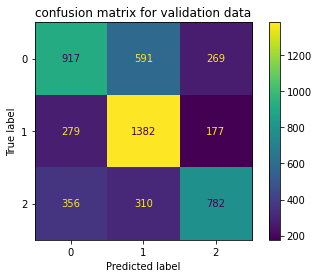

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_val, prob_val.cpu())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for validation data')

plt.show()

In [ ]:
prob_train=torch.tensor([]).to(device)
label_train=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(train_data_loader, total=len(train_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_train=torch.cat((prob_train,preds))
        label_train=torch.cat((label_train,sample_data_targets))

Validating... : 100%|██████████| 1265/1265 [00:53<00:00, 23.58it/s]


In [ ]:
label_train=label_train.cpu()
prob_train=prob_train.cpu()
acc_test = accuracy_score(label_train,prob_train)
f1_test = f1_score(label_train, prob_train, average="macro")
pre_test = precision_score(label_train, prob_train, average="macro")
recall_test = recall_score(label_train, prob_train, average="macro")
print(f"accuracy score on train data: {acc_test}")
print(f"f1 score on train data: {f1_test}")
print(f"precision score on train data: {pre_test}")
print(f"recall score on train data: {recall_test}")

accuracy score on train data: 0.724505928853755
f1 score on train data: 0.7197470864763638
precision score on train data: 0.7254295168161949
recall score on train data: 0.717807322221692


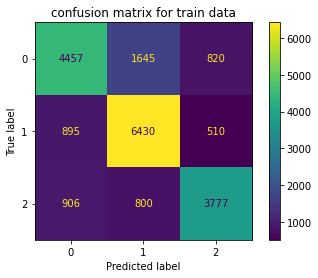

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_train, prob_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for train data')

plt.show()

In [ ]:
prob_test=torch.tensor([]).to(device)
label_test=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(test_data_loader, total=len(test_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_test=torch.cat((prob_test,preds))
        label_test=torch.cat((label_test,sample_data_targets))

Validating... : 100%|██████████| 317/317 [00:15<00:00, 20.95it/s]


In [ ]:
label_test=label_test.cpu()
prob_test=prob_test.cpu()
acc_test = accuracy_score(label_test,prob_test)
f1_test = f1_score(label_test, prob_test, average="macro")
pre_test = precision_score(label_test, prob_test, average="macro")
recall_test = recall_score(label_test, prob_test, average="macro")
print(f"accuracy score on test data: {acc_test}")
print(f"f1 score on test data: {f1_test}")
print(f"precision score on test data: {pre_test}")
print(f"recall score on test data: {recall_test}")

accuracy score on test data: 0.6224590487467929
f1 score on test data: 0.6057718065709466
precision score on test data: 0.6138456908798305
recall score on test data: 0.6062401985408336


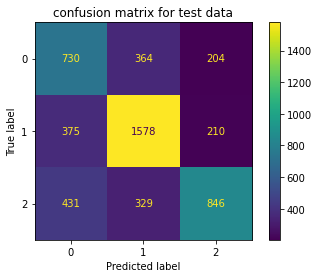

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_test, prob_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for test data')

plt.show()

### involving patch embedder in training process

as we said befor, we trained our patch embedder in previous part and then we freezed it and just used it, but in this part we try to also train patch embedder in process to see if using this method we can improve our accuracy or not

In [47]:
#finding max length
len_max = 0;
X = text_file_train
for i in range(len(X)):
  x_temp = X[i].split()
  if len(x_temp)>len_max:
    len_max = len(x_temp)
print(f"maximum length = {len_max}")
# now tokenizing based of max length we find
encoding = tokenizer.encode_plus(
    X[32],
    max_length=len_max+2,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

maximum length = 19
Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[  101, 15624,  1012,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [48]:
dataset = text_image_dataset(
        data=text_file_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

In [49]:
def train_model_manual_visual_bert_patch(model,patch_embedding, criterion, optimizer,scheduler,val_beark,data_loader_train,data_loader_val,len_train,len_val, num_epochs=25):
  """
  function for train our visual bert model!(patch embedder is also trainable in this process)
  inputs: 
      model: input model 
      criterion: desired loss function
      optimizer: our optimizer(!)
      scheduler: for changing learning rate after sum epochs
      num_epochs: number of epoches
      patch_embedding: model to create image embeddings
      val_beark: threshold for early stopping, if after "val_beark" steps our model don't get better, we end procces
  output:
      model: our trained model!


  """
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for batch in tqdm(data_loader_train, total=len(data_loader_train), desc="training... "):
      # 1. Forward pass
        
      sample_data_txt_chosen = batch['txt_chosen']
      sample_data_input_ids = batch['input_ids']
      sample_data_attention_mask = batch['attention_mask']
      sample_data_token_type_ids = batch['token_type_ids']
      sample_data_img = batch['image']
      sample_data_targets = batch['targets']
      sample_data_img = sample_data_img.to(device)

      patch_embedding = patch_embedding.to(device)
     
      sample_visual_embeds = patch_embedding(sample_data_img)
      sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
      sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

      sample_data_input_ids = sample_data_input_ids.to(device)
      sample_data_attention_mask = sample_data_attention_mask.to(device)
      sample_data_token_type_ids = sample_data_token_type_ids.to(device)
      sample_data_targets = sample_data_targets.to(device)
      sample_data_visual_embeds = sample_visual_embeds.to(device)
      sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
      sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)








      outputs = model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)

      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, sample_data_targets)
      acc_train += torch.sum(preds == sample_data_targets.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()
      del outputs,sample_data_input_ids,sample_data_attention_mask,sample_data_token_type_ids,sample_data_targets,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask,sample_visual_embeds

    loss_train = loss_train/len_train
    acc_train = 100*acc_train/len_train
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for batch in tqdm(data_loader_val, total=len(data_loader_val), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)



        _, preds = torch.max(outputs, 1)
        loss_test= criterion(outputs, sample_data_targets.data)
        acc_test += torch.sum(preds == sample_data_targets.data)
        del outputs,sample_data_input_ids,sample_data_attention_mask,sample_data_token_type_ids,sample_data_targets,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask
      loss_test = loss_test/len_val
      acc_test = 100*acc_test/len_val
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;
    

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
      del loss_test,loss_train,acc_train,acc_test
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

In [53]:
for param in patch_embedding.parameters():
    param.requires_grad = True

In [54]:
criterion = nn.CrossEntropyLoss()
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)
patch_embedding = patch_embedding.to(device)
params = list(pt_model.parameters()) + list(patch_embedding.parameters())

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(params, lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=20, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert_patch(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=5)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.88it/s]


Epoch: 0 | Loss: 0.06848, Acc: 37.59% | Test Loss: 0.00016, Test Acc: 39.80%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.69it/s]


Epoch: 1 | Loss: 0.06080, Acc: 52.68% | Test Loss: 0.00017, Test Acc: 56.05%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.64it/s]


Epoch: 2 | Loss: 0.05439, Acc: 60.74% | Test Loss: 0.00017, Test Acc: 59.49%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.57it/s]


Epoch: 3 | Loss: 0.05056, Acc: 64.19% | Test Loss: 0.00014, Test Acc: 58.74%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 26.52it/s]


Epoch: 4 | Loss: 0.04716, Acc: 67.37% | Test Loss: 0.00021, Test Acc: 59.89%
Training complete in 13m 37s
Best val Acc: 59.885445


as we can see, there is no much difference when we also train patch embedder.

### trying other pathc size in patch embedder

in previous part we splitted image to 25 by 25 image pathces and then applied conv layer to extract features as embedding (main idea of Vit network), lets try two other sizes, first 10 by 10 so we have more input features, but they only see small part of image and then we try 50 by 50 , so we have less input embedds but they encode more information

In [56]:
vit = ViT(num_classes=3,patch_size = 10).to(device)
from torch.utils.data import DataLoader
train_data_loader= DataLoader(train_data_set,batch_size=16,shuffle = True)
test_data_loader= DataLoader(test_data_set,batch_size=16,shuffle = False)
valid_data_loader= DataLoader(valid_data_set,batch_size=16,shuffle = False)

In [57]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(vit.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

vit = vit.to(device)
model_vit_trained,best_loss,best_acc = train_model_manual(vit, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(train_data_set),len(valid_data_set), num_epochs=5)

Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.28it/s]


Epoch: 0 | Loss: 0.08378, Acc: 35.67% | Test Loss: 0.00027, Test Acc: 28.58%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.10it/s]


Epoch: 1 | Loss: 0.08408, Acc: 34.90% | Test Loss: 0.00020, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.06it/s]


Epoch: 2 | Loss: 0.08477, Acc: 34.95% | Test Loss: 0.00021, Test Acc: 36.24%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.01it/s]


Epoch: 3 | Loss: 0.08226, Acc: 34.78% | Test Loss: 0.00023, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:11<00:00, 28.21it/s]

Epoch: 4 | Loss: 0.08337, Acc: 35.12% | Test Loss: 0.00018, Test Acc: 31.62%
Training complete in 12m 8s
Best val Acc: 36.302586


In [58]:
torch.save(model_vit_trained.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/vit4')

In [60]:
vit = ViT(num_classes=3,patch_size = 10).to(device)
vit = vit.to(device)
if device == 'cpu':
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit4', map_location=torch.device('cpu')))
else:
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit4'))
patch_embedding = vit.patch_embedding
del vit
patch_embedding.eval()
for param in patch_embedding.parameters():
    param.requires_grad = False

In [64]:
dataset = text_image_dataset(
        data=text_file_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

In [65]:
criterion = nn.CrossEntropyLoss()
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=20, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=10)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.38it/s]


Epoch: 0 | Loss: 0.06880, Acc: 37.24% | Test Loss: 0.00022, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.42it/s]


Epoch: 1 | Loss: 0.06837, Acc: 37.16% | Test Loss: 0.00022, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.34it/s]


Epoch: 2 | Loss: 0.06829, Acc: 37.63% | Test Loss: 0.00022, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.35it/s]


Epoch: 3 | Loss: 0.06819, Acc: 37.96% | Test Loss: 0.00022, Test Acc: 35.10%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.37it/s]


Epoch: 4 | Loss: 0.06822, Acc: 37.81% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.36it/s]


Epoch: 5 | Loss: 0.06819, Acc: 38.07% | Test Loss: 0.00019, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.38it/s]


Epoch: 6 | Loss: 0.06813, Acc: 38.50% | Test Loss: 0.00022, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.41it/s]


Epoch: 7 | Loss: 0.06816, Acc: 38.08% | Test Loss: 0.00021, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.41it/s]


Epoch: 8 | Loss: 0.06815, Acc: 38.22% | Test Loss: 0.00022, Test Acc: 36.30%


Validating... : 100%|██████████| 317/317 [00:37<00:00,  8.41it/s]


Epoch: 9 | Loss: 0.06812, Acc: 38.37% | Test Loss: 0.00023, Test Acc: 36.30%
Training complete in 77m 50s
Best val Acc: 36.302586


so as we can see, using small patch size for image embedding make results much worse! lets try to feed bigger patches to embedder module

In [66]:
vit = ViT(num_classes=3,patch_size = 50).to(device)
from torch.utils.data import DataLoader
train_data_loader= DataLoader(train_data_set,batch_size=16,shuffle = True)
test_data_loader= DataLoader(test_data_set,batch_size=16,shuffle = False)
valid_data_loader= DataLoader(valid_data_set,batch_size=16,shuffle = False)

In [67]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(vit.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=50, gamma=0.5)

vit = vit.to(device)
model_vit_trained,best_loss,best_acc = train_model_manual(vit, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(train_data_set),len(valid_data_set), num_epochs=5)

Validating... : 100%|██████████| 317/317 [00:01<00:00, 195.25it/s]


Epoch: 0 | Loss: 0.08536, Acc: 34.58% | Test Loss: 0.00035, Test Acc: 28.60%


Validating... : 100%|██████████| 317/317 [00:01<00:00, 201.32it/s]


Epoch: 1 | Loss: 0.08568, Acc: 34.81% | Test Loss: 0.00033, Test Acc: 35.10%


Validating... : 100%|██████████| 317/317 [00:01<00:00, 198.11it/s]


Epoch: 2 | Loss: 0.08555, Acc: 34.51% | Test Loss: 0.00027, Test Acc: 28.76%


Validating... : 100%|██████████| 317/317 [00:01<00:00, 201.79it/s]


Epoch: 3 | Loss: 0.08523, Acc: 34.82% | Test Loss: 0.00029, Test Acc: 34.64%


Validating... : 100%|██████████| 317/317 [00:01<00:00, 201.28it/s]


Epoch: 4 | Loss: 0.08381, Acc: 34.69% | Test Loss: 0.00029, Test Acc: 34.76%
Training complete in 4m 36s
Best val Acc: 35.097767


In [68]:
torch.save(model_vit_trained.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/vit5')

In [70]:
vit = ViT(num_classes=3,patch_size = 50).to(device)
vit = vit.to(device)
if device == 'cpu':
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit5', map_location=torch.device('cpu')))
else:
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit5'))
patch_embedding = vit.patch_embedding
del vit
patch_embedding.eval()
for param in patch_embedding.parameters():
    param.requires_grad = False

In [71]:
dataset = text_image_dataset(
        data=text_file_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

In [72]:
criterion = nn.CrossEntropyLoss()
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(pt_model.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=20, gamma=0.5)

pt_model = pt_model.to(device)
pt_model,best_loss,best_acc = train_model_manual_visual_bert(pt_model,patch_embedding, criterion, optimizer_conv,exp_lr_scheduler,20,train_data_loader,valid_data_loader,len(all_txt_train),len(all_txt_dev), num_epochs=10)

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.38it/s]


Epoch: 0 | Loss: 0.06030, Acc: 52.89% | Test Loss: 0.00016, Test Acc: 57.75%


Validating... : 100%|██████████| 317/317 [00:09<00:00, 35.03it/s]


Epoch: 1 | Loss: 0.05218, Acc: 62.75% | Test Loss: 0.00019, Test Acc: 60.00%


Validating... : 100%|██████████| 317/317 [00:09<00:00, 35.21it/s]


Epoch: 2 | Loss: 0.04821, Acc: 66.78% | Test Loss: 0.00024, Test Acc: 58.42%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.23it/s]


Epoch: 3 | Loss: 0.04448, Acc: 69.83% | Test Loss: 0.00024, Test Acc: 59.89%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.39it/s]


Epoch: 4 | Loss: 0.04002, Acc: 73.33% | Test Loss: 0.00017, Test Acc: 58.40%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.60it/s]


Epoch: 5 | Loss: 0.03599, Acc: 76.33% | Test Loss: 0.00027, Test Acc: 57.18%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.41it/s]


Epoch: 6 | Loss: 0.03174, Acc: 79.82% | Test Loss: 0.00016, Test Acc: 58.19%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.33it/s]


Epoch: 7 | Loss: 0.02705, Acc: 82.89% | Test Loss: 0.00035, Test Acc: 57.52%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.32it/s]


Epoch: 8 | Loss: 0.02321, Acc: 85.68% | Test Loss: 0.00036, Test Acc: 56.63%


Validating... : 100%|██████████| 317/317 [00:08<00:00, 35.38it/s]


Epoch: 9 | Loss: 0.02003, Acc: 87.93% | Test Loss: 0.00019, Test Acc: 56.98%
Training complete in 21m 5s
Best val Acc: 60.003948


In [73]:
torch.save(pt_model.state_dict(), '/content/gdrive/MyDrive/Phase_4_models/visual_transformer50')

In [74]:
dataset = text_image_dataset(
        data=text_file_train,
        labels=sentiment_train,
        tokenizer=tokenizer,
        img_list = train_data_set,
        max_len=MAX_LEN,)
train_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_dev,
        labels=sentiment_dev,
        tokenizer=tokenizer,
        img_list = valid_data_set,
        max_len=MAX_LEN,)
valid_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)

dataset = text_image_dataset(
        data=text_file_test,
        labels=sentiment_test,
        tokenizer=tokenizer,
        img_list = test_data_set,
        max_len=MAX_LEN,)
test_data_loader = DataLoader(dataset,batch_size = 16,shuffle = True)





In [75]:
pt_model = Visual_Bert_classifier(config=config,MODEL_NAME_OR_PATH = "uclanlp/visualbert-vqa-coco-pre",fine_tune = True )
pt_model = pt_model.to(device)
if device == 'cpu':
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer50',map_location=torch.device('cpu')))
else:
  pt_model.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/visual_transformer50'))

Some weights of the model checkpoint at uclanlp/visualbert-vqa-coco-pre were not used when initializing VisualBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing VisualBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing VisualBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [76]:
vit = ViT(num_classes=3,patch_size = 50).to(device)
vit = vit.to(device)
if device == 'cpu':
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit5', map_location=torch.device('cpu')))
else:
  vit.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_4_models/vit5'))
patch_embedding = vit.patch_embedding
del vit
patch_embedding.eval()
for param in patch_embedding.parameters():
    param.requires_grad = False

In [77]:
prob_val=torch.tensor([]).to(device)
label_val=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(valid_data_loader, total=len(valid_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_val=torch.cat((prob_val,preds))
        label_val=torch.cat((label_val,sample_data_targets))

Validating... : 100%|██████████| 317/317 [00:09<00:00, 32.91it/s]


In [78]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


from sklearn import metrics

In [79]:
label_val=label_val.cpu()
prob_val=prob_val.cpu()
acc_test = accuracy_score(label_val,prob_val)
f1_test = f1_score(label_val, prob_val, average="macro")
pre_test = precision_score(label_val, prob_val, average="macro")
recall_test = recall_score(label_val, prob_val, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")

accuracy score on validation data: 0.5998419909144775
f1 score on validation data: 0.5981846903174427
precision score on validation data: 0.5993332383970164
recall score on validation data: 0.5978253100688807


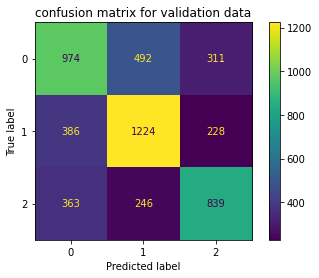

In [80]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_val, prob_val.cpu())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for validation data')

plt.show()

In [81]:
prob_train=torch.tensor([]).to(device)
label_train=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(train_data_loader, total=len(train_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_train=torch.cat((prob_train,preds))
        label_train=torch.cat((label_train,sample_data_targets))

Validating... : 100%|██████████| 1265/1265 [00:46<00:00, 27.40it/s]


In [82]:
label_train=label_train.cpu()
prob_train=prob_train.cpu()
acc_test = accuracy_score(label_train,prob_train)
f1_test = f1_score(label_train, prob_train, average="macro")
pre_test = precision_score(label_train, prob_train, average="macro")
recall_test = recall_score(label_train, prob_train, average="macro")
print(f"accuracy score on train data: {acc_test}")
print(f"f1 score on train data: {f1_test}")
print(f"precision score on train data: {pre_test}")
print(f"recall score on train data: {recall_test}")

accuracy score on train data: 0.6938241106719367
f1 score on train data: 0.6914282429663036
precision score on train data: 0.6906610145903903
recall score on train data: 0.6923544532360323


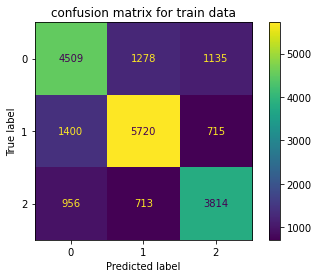

In [83]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_train, prob_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for train data')

plt.show()

In [84]:
prob_test=torch.tensor([]).to(device)
label_test=torch.tensor([]).to(device)
with torch.inference_mode():
    for batch in tqdm(test_data_loader, total=len(test_data_loader), desc="Validating... "):
      # 1. Forward pass
        sample_data_txt_chosen = batch['txt_chosen']
        sample_data_input_ids = batch['input_ids']
        sample_data_attention_mask = batch['attention_mask']
        sample_data_token_type_ids = batch['token_type_ids']
        sample_data_img = batch['image']
        sample_data_targets = batch['targets']

        sample_data_img = sample_data_img.to(device)

        patch_embedding = patch_embedding.to(device)

        sample_visual_embeds = patch_embedding(sample_data_img)
        sample_visual_token_type_ids = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.long)
        sample_visual_attention_mask = torch.ones(sample_visual_embeds.shape[:-1], dtype=torch.float)

        sample_data_input_ids = sample_data_input_ids.to(device)
        sample_data_attention_mask = sample_data_attention_mask.to(device)
        sample_data_token_type_ids = sample_data_token_type_ids.to(device)
        sample_data_targets = sample_data_targets.to(device)
        sample_data_visual_embeds = sample_visual_embeds.to(device)
        sample_data_visual_token_type_ids = sample_visual_token_type_ids.to(device)
        sample_data_visual_attention_mask = sample_visual_attention_mask.to(device)
        outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids,sample_data_visual_embeds,sample_data_visual_token_type_ids,sample_data_visual_attention_mask)
        _, preds = torch.max(outputs, 1)
        prob_test=torch.cat((prob_test,preds))
        label_test=torch.cat((label_test,sample_data_targets))

Validating... : 100%|██████████| 317/317 [00:16<00:00, 19.64it/s]


In [85]:
label_test=label_test.cpu()
prob_test=prob_test.cpu()
acc_test = accuracy_score(label_test,prob_test)
f1_test = f1_score(label_test, prob_test, average="macro")
pre_test = precision_score(label_test, prob_test, average="macro")
recall_test = recall_score(label_test, prob_test, average="macro")
print(f"accuracy score on test data: {acc_test}")
print(f"f1 score on test data: {f1_test}")
print(f"precision score on test data: {pre_test}")
print(f"recall score on test data: {recall_test}")

accuracy score on test data: 0.6072626800868364
f1 score on test data: 0.5968667707512417
precision score on test data: 0.60119136270891
recall score on test data: 0.5996516051608124


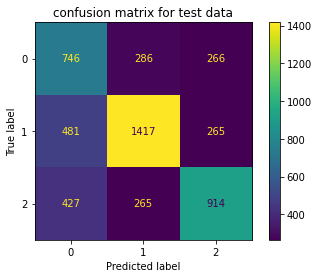

In [86]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(label_test, prob_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for test data')

plt.show()

as we can see, when input image is 50 by 50 answers are also good, but we got our best answere when we used 25 by 25 image pathces and used whole text(with punctoations) ( we achived near 61 accuracy for validation and test data there and plotted it confusion matrix in previous parts)